# Natural Language Processing - Bill Text Exploration


Transform the raw data into feature vectors and these new features will be created using the existing dataset. Structure as follows:

Data Exploration
- Word Cloud 

Vectorizers
- Custom and Spacy Tokenizer
- Count Vectors as features
- TF-IDF Vectors as features

- Word level
- N-Gram level

Character level
- Word Embeddings as features
- Text / NLP based features
- Topic Models as features

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [1]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db


In [2]:
def query(q):
    try:
        return pd.read_sql_query(q, engine)
    # Pass when no data is returned    
    except ResourceClosedError:
        pass

def query_list(col, table, distinct = True):
    elts = ['SELECT',
            'DISTINCT' if distinct else '',
            col,
            'FROM',
            table]
    query_str = ' '.join(elts)
    df = query(query_str)
    l = df.iloc[:,0].tolist()
    return l

In [3]:
engine = db.create_engine(f'mysql+mysqlconnector://{config_final.user}:{config_final.password}@{config_final.host}/con_bills')

connection = engine.connect()
metadata=db.MetaData()

In [4]:
df = query('SELECT BillID, Title, Summary, PassH, Cong FROM con_bills.current_bills')


In [5]:
df.tail()

,BillID,Title,Summary,PassH,Cong
22629,114-S-995,A bill to establish congressional trade negoti...,Bipartisan Congressional Trade Priorities and ...,0,114
22630,114-S-996,A bill to facilitate nationwide availability o...,Volunteer Income Tax Assistance (VITA) Act,0,114
22631,114-S-997,A bill to extend the authorization for the maj...,"Department of Veterans Affairs Construction, A...",0,114
22632,114-S-998,A bill to establish a process for the consider...,American Manufacturing Competitiveness Act of ...,0,114
22633,114-S-999,A bill to amend the Small Business Act to prov...,Small Business Development Centers Improvement...,0,114


In [6]:
df['PassH'].value_counts()

0    21018
1     1616
Name: PassH, dtype: int64

In [7]:
blanks = []

for i, billID, title, summary, PassH, Cong in df.itertuples():  # iterate over the DataFrame
    if type(summary)==str:            # avoid NaN values
        if summary.isspace():         # test 'plot' for whitespace
            blanks.append(i)
                  
len(blanks)

0

# Wordcloud Exploration

Initial exploration of topics in dependent variable using wordcloud and stopword engineering.

Pass House 0 = Bills did not pass House

Pass House 1 = Bill passed House


In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.add("concurrent")
stopwords.add("resolution")
stopwords.add("recognizing")
stopwords.add("providing")
stopwords.add("provide")
stopwords.add("bill")
stopwords.add("congressional")
stopwords.add("authorizing")
stopwords.add("authorize")
stopwords.add("designating")
stopwords.add("designate")
stopwords.add("printi")
stopwords.add("printing")
stopwords.add("printed")
stopwords.add("Congress")
stopwords.add("Authorizes")
stopwords.add("Provides")

In [9]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords, 
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


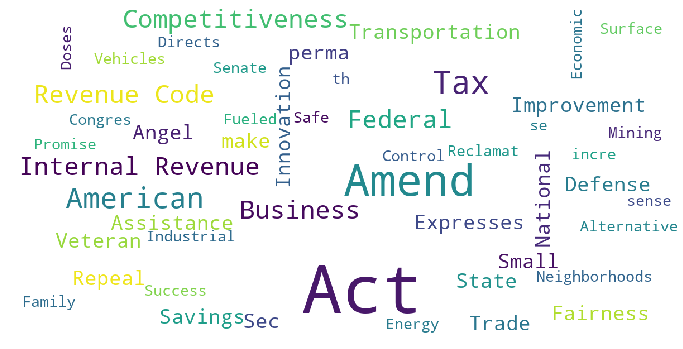

In [10]:
show_wordcloud(df[df['PassH']==0]['Summary'])

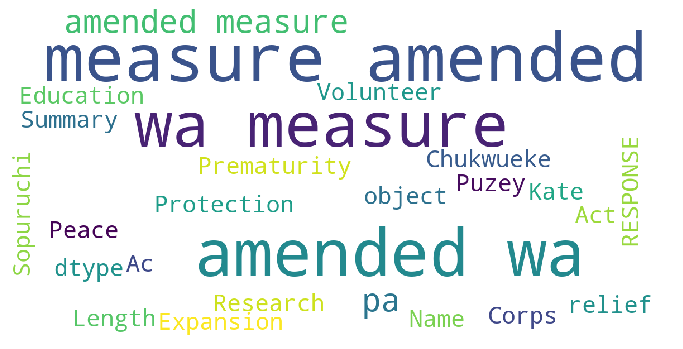

In [11]:
show_wordcloud(df[df['PassH']==1]['Summary'])

In [12]:
#Wordcloud on difference of frequencies

# Topic Modeling

**Split Training and Testing Data**

In [13]:
from sklearn import preprocessing

In [14]:
from sklearn.model_selection import train_test_split

X = df['Title']
y = df['PassH']

X_train, y_train1, X_test, y_test1 = train_test_split(X, y)

Encode our target column so that it can be used in machine learning models (may not be necessary since the data is already binary)

In [15]:
encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train1)
y_test = encoder.fit_transform(y_test1)

## Feature Engineering


**Cleaning Text**

Test both the spacy tokenizer and personalized tokenizer against the data.

In [16]:
import spacy
from spacy.lang.en import English
# For part of speech tagging
import en_core_web_sm

nlp = English()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [17]:
#Editing the stopwords list
spacy_stopwords.add('concurrent', 'resolution')

TypeError: add() takes exactly one argument (2 given)

In [19]:
#Lemmitization
for word in lem:
    print(word.text, word.lemma_)

NameError: name 'lem' is not defined

In [21]:
#Part of speech tagging
nlp_pos = en_core_web_sm.load()


In [22]:
#Define the spacy tokenizer
spacy_tokenizer = spacy.load('en_core_web_sm', disable =['tagger', 'parser', 'ner'])

In [23]:
import string
import re

replace_with_space = re.compile('[/(){}\[\]\|@,;]')

just_words = re.compile('[^a-zA-Z\s]')


In [24]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

lookups = Lookups()
lookups.add_table("lemma_rules", {"noun": [["s", ""]]})

lemmatizer = Lemmatizer(lookups)

In [25]:
#Define the custom tokenizer
def clean(text):
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = replace_with_space.sub('',text)
    
    text = just_words.sub('', text)
    
#     text = ' '.join(word for word in text.split() if word not in stopwords)
    
    #Lemma here
    
    return text
    
      

In [ ]:
def final_clean(text):
    
        stopwords = set(STOPWORDS)

In [26]:
def tokenizer(text):
    
    text = clean(text)
    text = nlp(text)
    
    lem_text = []
    for word in text:
        lem_text.append(word.lemma_)
    
    stopwords = set(STOPWORDS)
    
    return lem_text
    

In [30]:
test_fun = df.iloc[7700][2]
test_fun

'Amends the federal criminal code to impose a fine and/or prison term of up to 10 years on any officer or employee of the Internal Revenue Service (IRS) who willfully acts, or purports to act, in his or her official capacity, whether or not under color of law, with the intent to injure, oppress, threaten, intimidate, or single out and subject to undue scrutiny for purposes of harassment any person or organization in any state: (1) based solely or primarily on the political, economic, or social positions held or expressed by such person or organization; or (2) because such person or organization has expressed a particular political, economic, or social position using any words or writing allowed by law.'

In [31]:
type(test_fun)

str

In [32]:
clean(test_fun)

'amends the federal criminal code to impose a fine andor prison term of up to  years on any officer or employee of the internal revenue service irs who willfully acts or purports to act in his or her official capacity whether or not under color of law with the intent to injure oppress threaten intimidate or single out and subject to undue scrutiny for purposes of harassment any person or organization in any state  based solely or primarily on the political economic or social positions held or expressed by such person or organization or  because such person or organization has expressed a particular political economic or social position using any words or writing allowed by law'

In [33]:
tokenizer(test_fun)


['amends',
 'the',
 'federal',
 'criminal',
 'code',
 'to',
 'impose',
 'a',
 'fine',
 'andor',
 'prison',
 'term',
 'of',
 'up',
 'to',
 ' ',
 'years',
 'on',
 'any',
 'officer',
 'or',
 'employee',
 'of',
 'the',
 'internal',
 'revenue',
 'service',
 'irs',
 'who',
 'willfully',
 'acts',
 'or',
 'purports',
 'to',
 'act',
 'in',
 'his',
 'or',
 'her',
 'official',
 'capacity',
 'whether',
 'or',
 'not',
 'under',
 'color',
 'of',
 'law',
 'with',
 'the',
 'intent',
 'to',
 'injure',
 'oppress',
 'threaten',
 'intimidate',
 'or',
 'single',
 'out',
 'and',
 'subject',
 'to',
 'undue',
 'scrutiny',
 'for',
 'purposes',
 'of',
 'harassment',
 'any',
 'person',
 'or',
 'organization',
 'in',
 'any',
 'state',
 ' ',
 'based',
 'solely',
 'or',
 'primarily',
 'on',
 'the',
 'political',
 'economic',
 'or',
 'social',
 'positions',
 'held',
 'or',
 'expressed',
 'by',
 'such',
 'person',
 'or',
 'organization',
 'or',
 ' ',
 'because',
 'such',
 'person',
 'or',
 'organization',
 'has',
 'e

In [34]:
spacy_tokenizer(test_fun)

Amends the federal criminal code to impose a fine and/or prison term of up to 10 years on any officer or employee of the Internal Revenue Service (IRS) who willfully acts, or purports to act, in his or her official capacity, whether or not under color of law, with the intent to injure, oppress, threaten, intimidate, or single out and subject to undue scrutiny for purposes of harassment any person or organization in any state: (1) based solely or primarily on the political, economic, or social positions held or expressed by such person or organization; or (2) because such person or organization has expressed a particular political, economic, or social position using any words or writing allowed by law.

**Saving to DF**

In [35]:
df['clean_summaries'] = df.apply(lambda row: clean(row['Summary']), axis=1)

In [36]:
df['tokenized_summaries'] = df.apply(lambda row: tokenizer(row['Summary']), axis=1)


In [37]:
df.head()

,BillID,Title,Summary,PassH,Cong,clean_summaries,tokenized_summaries
0,112-S-1,A bill to strengthen the economic competitiven...,Expresses the sense of the Senate that Congres...,0,112,expresses the sense of the senate that congres...,"[expresses, the, sense, of, the, senate, that,..."
1,112-S-10,A bill to ensure equity for women and address ...,Family Economic Success Act - Expresses the se...,0,112,family economic success act expresses the sen...,"[family, economic, success, act, , expresses,..."
2,112-S-100,A bill to amend the Internal Revenue Code of 1...,Amends the Internal Revenue Code to: (1) incre...,0,112,amends the internal revenue code to increase ...,"[amends, the, internal, revenue, code, to, , ..."
3,112-S-1000,A bill to promote energy savings in residentia...,Energy Savings and Industrial Competitiveness ...,0,112,energy savings and industrial competitiveness ...,"[energy, savings, and, industrial, competitive..."
4,112-S-1001,A bill to reduce oil consumption and improve e...,Alternative Fueled Vehicles Competitiveness an...,0,112,alternative fueled vehicles competitiveness an...,"[alternative, fueled, vehicles, competitivenes..."


**CountVectorizer**

Every row represents a document in the corpus, every column represents a term in the document, every cell represents the frequency count of a particular term in a particular document.

Tuning: analyzer, vectorizer, max_features, max_df, min_df, n_grams

In [45]:
#decide if i want to use these

# params = {'vect__max_df': (0.5, 0.75, 1.0),
#         'vect__max_features': (None, 5000, 10000, 50000),
#         'vect__ngram_range': ((1, 1), (1, 2))
#          }

In [40]:
#Gridsearch

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer= 'word', tokenizer = tokenizer)
transformed = vectorizer.fit_transform(X_train, y_train)
print(len(vectorizer.get_feature_names()))

12139


**Exploring Stored Words**

In [57]:
print(vectorizer.get_feature_names())

[' ', '  ', '   ', '-PRON-', 'a', 'aa', 'aaa', 'aaron', 'abandoned', 'abandonment', 'abate', 'abatement', 'abatements', 'abdoul', 'abducted', 'abduction', 'abet', 'abide', 'abie', 'ability', 'abilitytobenefit', 'abisphenol', 'abjuration', 'able', 'ablebodied', 'abner', 'aboard', 'abolish', 'abolishing', 'abolishment', 'abolition', 'aboriginal', 'abortion', 'abortionrelated', 'abortions', 'about', 'above', 'abovetheline', 'abraham', 'abridged', 'abridges', 'abroad', 'abrogates', 'abrogation', 'abs', 'absence', 'absences', 'absent', 'absentee', 'absolve', 'abstinence', 'abstinenceonly', 'abundant', 'abuse', 'abused', 'abusedeterrent', 'abusers', 'abuses', 'abusive', 'ac', 'academia', 'academic', 'academically', 'academics', 'academies', 'academy', 'acadia', 'acaexpansion', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'acceptor', 'access', 'accessed', 'accessibility', 'accessible', 'accessing', '

In [58]:
len(vectorizer.get_feature_names())

12139

In [65]:
import random

#get ten random words from each

for i in range(10):
    word_id = random.randint(0, 12139) #second should be len of cv
    print(vectorizer.get_feature_names()[word_id])

rewarding
unsuitable
jeffery
glende
calls
threatened
attempting
gym
sourcing
peace


Look at model components:

In [ ]:
lda_model.components_

In [ ]:
single_topic = lda_model.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

#look at the most and least representative words!

In [ ]:
# Word least representative of this topic
single_topic[XXX]

#first round goes from 0.05 to 106.1

In [ ]:
# Word most representative of this topic
single_topic[XXX]

Look at the top fifteen for each topic:

In [ ]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

#print top fifteen words for each topic
#increase number of topics to get more specific topics
#go back and clean some of the data based on answers

NEXT: Dominant topic visualizations

'LDA-Guided-Project'

**Topic Modeling - LDA**

LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics.

In [229]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Build LDA Model
#focus on number topics, max iteration, learning decay
lda_model = LatentDirichletAllocation(n_components=15,               # Number of topics
                                      max_iter=20,  
                                      learning_decay=0.5,    # Max learning iterations (how many times going over whole dataset)
                                      learning_method='online',   #constantly update with new data or batch
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

print(lda_model)  # Model attributes

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!

lda_output = lda_model.fit_transform(cv)


**Evaluation of Model:**

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(cv))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(cv))

# See model parameters
print(lda_model.get_params())

**Data Mapper Pipeline**


This allow each column to be mapped to different encoders.

https://pypi.org/project/dataframe-mapper/

In [27]:
!pip install dataframe-mapper

In [ ]:
column_tuples = [
    ('Sales', None),
    ('ShelveLoc', LabelEncoder()),
    ('Urban', LabelEncoder()), 
    ('US', LabelEncoder())]

mapper = DataFrameMapper(column_tuples, default=StandardScaler())
mapper_fit = mapper.fit(train)